# **Customer Churn Prediction**

**DQLab Telco** merupakan perusahaan Telco yang sudah mempunyai banyak cabang tersebar dimana-mana. Sejak berdiri pada tahun 2019, DQLab Telco konsisten untuk memperhatikan customer experience nya sehingga tidak akan di tinggalkan pelanggan. Walaupun baru berumur 1 tahun lebih sedikit, DQLab Telco sudah mempunyai banyak pelanggan yang beralih langganan ke kompetitior. Pihak management ingin mengurangi jumlah pelanggan yang beralih (**churn**) dengan menggunakan machine learning.

Pada Part 2 ini akan dilakukan pemodelan untuk **memprediksi churn** dari pelanggan DQLab Telco menggunakan dataset yang telah dibersihkan (clean dataset) pada Part 1 sebelumnya.


## **Dataset**

Dataset ini merupakan data yang telah dilakukan proses **cleansing** pada Part 1. Berikut adalah dekripsi variabel datanya:

* UpdatedAt : Periode of Data taken
* customerID : Customer ID
* gender : Whether the customer is a male or a female (Male, Female)
* SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
* Partner : Whether the customer has a partner or not (Yes, No)
* Dependents : Whether the customer has dependents or not (Yes, No)
* tenure : Number of months the customer has stayed with the company
* PhoneService : Whether the customer has a phone service or not (Yes, No)
* MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract : The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges : The amount charged to the customer monthly
* TotalCharges : The total amount charged to the customer
* Churn : Whether the customer churned or not (Yes or No)

## **Import Library**

LIbrary yang digunakan dalam pembahasan ini meliputi:
- **numpy, pandas** untuk analisis dan manipulasi data.
- **matplotlib** dan seaborn untuk visualisasi data.
- **scikit-learn** untuk pemodelan data.
- **warnings** untuk menghilangkan tanda peringatan.

In [1]:
# Load library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')
 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

## **Load Clean Data**

In [2]:
# Load dataset
df_clean= pd.read_csv('data/data_cleansing_telco.csv')

# Print first five rows
df_clean.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45315483266,Male,0,Yes,No,60.0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.50,1198.80,No
2,202006,45236961615,Male,0,No,No,5.0,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,104.10,541.90,Yes
3,202006,45929827382,Female,0,Yes,No,72.0,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.50,8312.75,No
4,202006,45305082233,Female,0,Yes,Yes,56.0,Yes,Yes,DSL,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),81.25,4620.40,No


In [3]:
# Print number of rows and cols
print(f'Clean Dataset terdiri dari {df_clean.shape[0]} baris dan {df_clean.shape[1]} kolom')

# Print number of unique Customer ID
print('Jumlah unik Customer ID adalah',df_clean.customerID.nunique())

Clean Dataset terdiri dari 6950 baris dan 22 kolom
Jumlah unik Customer ID adalah 6950


In [4]:
# View info data
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         6950 non-null   int64  
 1   customerID        6950 non-null   int64  
 2   gender            6950 non-null   object 
 3   SeniorCitizen     6950 non-null   int64  
 4   Partner           6950 non-null   object 
 5   Dependents        6950 non-null   object 
 6   tenure            6950 non-null   float64
 7   PhoneService      6950 non-null   object 
 8   MultipleLines     6950 non-null   object 
 9   InternetService   6950 non-null   object 
 10  OnlineSecurity    6950 non-null   object 
 11  OnlineBackup      6950 non-null   object 
 12  DeviceProtection  6950 non-null   object 
 13  TechSupport       6950 non-null   object 
 14  StreamingTV       6950 non-null   object 
 15  StreamingMovies   6950 non-null   object 
 16  Contract          6950 non-null   object 


Karena sudah dilakukan proses *cleansing* sebelumnya, maka tidak lagi ditemukan *missing values* dan kesalahan format data.

## **Exploratory Data Analysis**

**Exploratory Data Analysis** bertujuan memahami isi data yang digunakan, mulai dari distribusi, frekuensi, korelasi dan lainnya. Pada umumnya EDA dilakukan dengan beberapa cara:
  -  **Univariat Analysis** — analisis deskriptif dengan satu variabel.
  -  **Bivariat Analysis** — analisis relasi dengan dua variabel yang biasanya dengan target variabel.
  -  **Multivariat Analysis** — analisis yang menggunakan lebih dari atau sama dengan tiga variabel.

Dalam kasus ini, kita akan melihat persebaran dari:
  -  Prosentase persebaran data Churn dan tidaknya dari seluruh data
  -  Persebaran data dari variable predictor terhadap label (Churn)

**Prosentase Churn Customer**

Mengetahui proporsi data pelanggan yang dianggap churn atau tidak.

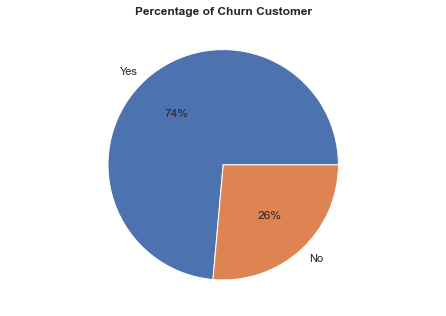

In [5]:
# Setting Figure and Axes
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

# Pie Chart kolom Churn
labels = ['Yes', 'No']
churn = df_clean.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
ax.set_title('Percentage of Churn Customer', fontweight='bold')
plt.show()

**Exploratory Data Analysis (EDA) Variabel Numerik**

Hal yang akan kita lakukan selanjutnya adalah memilih variable predictor yang bersifat numerik dan membuat plot secara bivariat dan menginterpretasikannya.

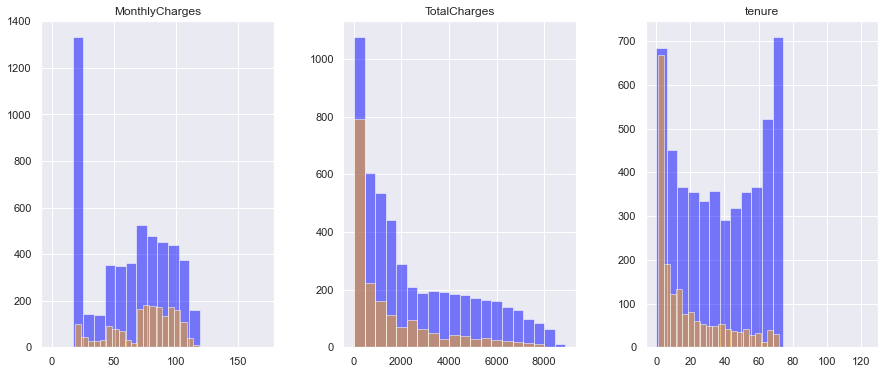

In [6]:
# Creating bin in chart
numerical_features = ['MonthlyCharges', 'TotalCharges', 'tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

# Plotting with histogram
df_clean[df_clean.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_clean[df_clean.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

**Exploratory Data Analysis (EDA) Variabel Kategorik**

Setelah itu, kita akan melakukan pemilihan variable predictor yang bersifat kategorik dan membuat plot secara bivariat, kemudian menginterpretasikannya.

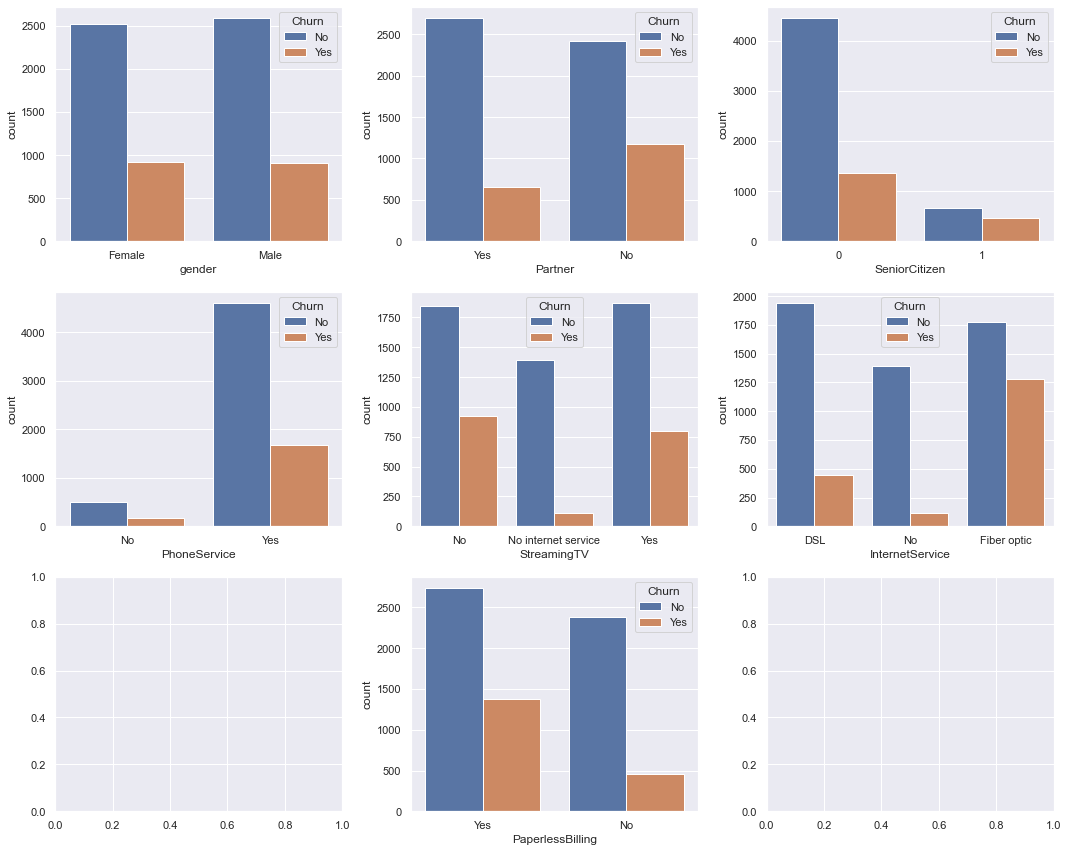

In [7]:
# Plotting with bar chart using subplots
fig, ax = plt.subplots(3, 3, figsize=(15, 12))
sns.countplot(data=df_clean, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_clean, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_clean, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_clean, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_clean, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_clean, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_clean, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

Berdasarkan hasil dan analisa di atas dapat disimpulkan:

1. Proporsi data pelanggan yang dianggap Churn sebanyak 26% dan No Churn sebanyak 74%.
2. Pada distribusi variabel numerik diketahui bahwa MonthlyCharges ada kecenderungan semakin kecil nilai biaya bulanan yang dikenakan, semakin kecil juga kecenderungan untuk melakukan Churn. Untuk TotalCharges terlihat tidak ada kecenderungan apapun terhadap Churn customers. Untuk tenure ada kecenderungan semakin lama berlangganan customer, semakin kecil kecenderungan untuk melakukan Churn.
3. Pada distribusi variabel kategorik diketahui bahwa tidak ada perbedaan yang signifikan untuk orang melakukan churn dilihat dari faktor jenis kelamin (gender) dan layanan telfonnya (PhoneService). Akan tetapi ada kecenderungan bahwa orang yang melakukan churn adalah orang-orang yang tidak memiliki partner (partner: No), orang-orang yang statusnya adalah senior citizen(SeniorCitizen: Yes), orang-orang yang mempunyai layanan streaming TV (StreamingTV: Yes), orang-orang yang mempunyai layanan Internet (internetService: Yes) dan orang-orang yang tagihannya paperless (PaperlessBilling: Yes).


## **Data Modelling**

### **Preprocessing Data**

Sebelum dimodelkan, kita akan melakukan preprocessing data seperti:
- Menghapus kolom atau variabel yang tidak diperlukan.
- Melakukan encoding data agar lebih mudah dikenali model.
- Membagi dataset menjadi train set dan test set.

**Menghapus Unnecessary Columns**

Selanjutnya kita akan menghapus kolom yang tidak akan diikutsertakan dalam pemodelan, yaitu ID Number pelanggannya (**customerID**) & periode pengambilan datanya (**UpdatedAt**). Kemudian simpan dengan nama `df_model` dan tampilkan 5 rows teratas nya.

In [8]:
# Remove the unnecessary columns customerID & UpdatedAt
df_model = df_clean.drop(['customerID','UpdatedAt'], axis=1)
df_model.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,Yes,No,60.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.50,1198.80,No
2,Male,0,No,No,5.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,104.10,541.90,Yes
3,Female,0,Yes,No,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.50,8312.75,No
4,Female,0,Yes,Yes,56.0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),81.25,4620.40,No


**Encoding Data**

Selanjutnya mengubah nilai dari data yang masih berbentuk string ke dalam bentuk numerik menggunakan `LabelEncoder`.

In [9]:
#Convert all the non-numeric columns to numerical data types
for column in df_model.columns:
    if df_model[column].dtype == np.number:
        continue
    # Perform encoding for each non-numeric column
    df_model[column] = LabelEncoder().fit_transform(df_model[column])

df_model.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,1,0,60.0,1,0,2,1,1,1,1,1,1,2,1,0,20.50,1198.80,0
2,1,0,0,0,5.0,1,2,1,0,2,2,0,2,2,0,0,3,104.10,541.90,1
3,0,0,1,0,72.0,1,2,1,2,2,2,2,2,2,2,1,0,115.50,8312.75,0
4,0,0,1,1,56.0,1,2,0,2,2,2,2,2,0,2,0,1,81.25,4620.40,0


**Splitting Dataset**

Gunakan data dari hasil dan analisa sebelumnya `df_model`, untuk dibagi datasetnya menjadi 2 bagian (70% training & 30% testing) berdasarkan variable predictor (X) dan targetnya (y). Gunakan `train_test_split` untuk membagi data tersebut.

In [10]:
# Predictor dan target
X = df_model.drop('Churn', axis = 1)
y = df_model['Churn']

# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape)
print('Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('\nJumlah baris dan kolom dari x_test adalah:', x_test.shape)
print('Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (4865, 19)
Jumlah baris dan kolom dari y_train adalah: (4865,)
Prosentase Churn di data Training adalah:
0    0.734841
1    0.265159
Name: Churn, dtype: float64

Jumlah baris dan kolom dari x_test adalah: (2085, 19)
Jumlah baris dan kolom dari y_test adalah: (2085,)
Prosentase Churn di data Testing adalah:
0    0.738129
1    0.261871
Name: Churn, dtype: float64


### **Model Selection**

Kita akan membuat model dari 3 algoritma, yaitu **Logistic Regression, Random Forest Classifier, dan Gradient Boosting Classifier**. 

Adapun tahapannya antara lain:
- Pilih Model yang akan dibuat
- Fit data train dengan model tersebut
- Lakukan prediksi terhadap data test
- Hitung performansi model


**Logistic Regression**

In [11]:
# Build model logistic regression
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Print accuracy score
print('Train Accuracy Score', lr.score(x_train, y_train))
print('Test Accuracy Score', lr.score(x_test, y_test))

Train Accuracy Score 0.7987667009249743
Test Accuracy Score 0.8062350119904077


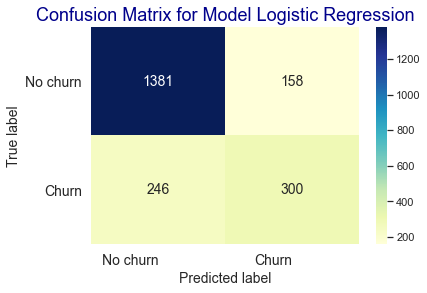

In [12]:
# Form Confusion Matrix
lr_preds = lr.predict(x_test)
lr_cnf = pd.DataFrame((confusion_matrix(y_test, lr_preds)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
lr_heatmap = sns.heatmap(lr_cnf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
lr_heatmap.yaxis.set_ticklabels(lr_heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
lr_heatmap.xaxis.set_ticklabels(lr_heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

# Axis label
plt.title('Confusion Matrix for Model Logistic Regression', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [13]:
# Classification Report
print('Classification Report Model Logistic Regression')
lr_report = classification_report(y_test, lr_preds)
print('\n',lr_report)

Classification Report Model Logistic Regression

               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.66      0.55      0.60       546

    accuracy                           0.81      2085
   macro avg       0.75      0.72      0.74      2085
weighted avg       0.80      0.81      0.80      2085



Dari hasil di atas dapat disimpulkan bahwa:
- Model Logistic Regression dengan settingan default menghasilkan skor akurasi 79.8% pada fase training dan 80.6% pada fase testing.
- Berdasarkan hasil confusion matrix model Logistic Regression dalam memprediksi churn pelanggan pada data testing menghasilkan nilai True Positive sebanyak 300, True Negative sebanyak 1381, False Positive sebanyak 158, dan False Negative sebanyak 248.

**Random Forest Classifier**

In [14]:
# Build model random forest classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

# Print accuracy score
print('Train Accuracy Score :', rfc.score(x_train, y_train))
print('Test Accuracy Score', rfc.score(x_test, y_test))

Train Accuracy Score : 0.9975334018499487
Test Accuracy Score 0.7985611510791367


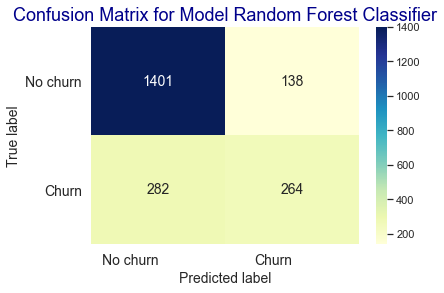

In [15]:
# Form Confusion Matrix
rfc_preds = rfc.predict(x_test)
rfc_cnf = pd.DataFrame((confusion_matrix(y_test, rfc_preds)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
rfc_heatmap = sns.heatmap(rfc_cnf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
rfc_heatmap.yaxis.set_ticklabels(rfc_heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
rfc_heatmap.xaxis.set_ticklabels(rfc_heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

# Axis label
plt.title('Confusion Matrix for Model Random Forest Classifier', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [16]:
# Classification Report
print('Classification Report Model Random Forest Classifier')
rfc_report = classification_report(y_test, rfc_preds)
print('\n',rfc_report)

Classification Report Model Random Forest Classifier

               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.66      0.48      0.56       546

    accuracy                           0.80      2085
   macro avg       0.74      0.70      0.71      2085
weighted avg       0.79      0.80      0.79      2085



Dari hasil di atas dapat disimpulkan bahwa:

- Model Random Forest Classifier dengan settingan default menghasilkan skor akurasi 99.7% pada fase training dan 80.4% pada fase testing.
- Berdasarkan hasil confusion matrix model Random Forest Classifier dalam memprediksi churn pelanggan pada data testing menghasilkan nilai True Positive sebanyak 260, True Negative sebanyak 1412, False Positive sebanyak 27, dan False Negative sebanyak 286.

In [17]:
# Build model gradient boosting classifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

# Print accuracy score
print('Train Accuracy Score :', gbc.score(x_train, y_train))
print('Test Accuracy Score :', gbc.score(x_test, y_test))

Train Accuracy Score : 0.8308324768756423
Test Accuracy Score : 0.8095923261390887


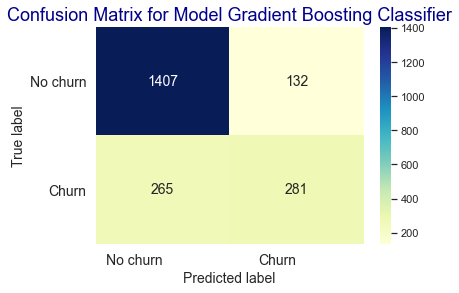

In [18]:
# Form Confusion Matrix
gbc_preds = gbc.predict(x_test)
gbc_cnf = pd.DataFrame((confusion_matrix(y_test, gbc_preds)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
gbc_heatmap = sns.heatmap(gbc_cnf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
gbc_heatmap.yaxis.set_ticklabels(gbc_heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
gbc_heatmap.xaxis.set_ticklabels(gbc_heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

# Axis label
plt.title('Confusion Matrix for Model Gradient Boosting Classifier', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [19]:
# Classification Report
print('Classification Report Model Gradient Boosting Classifier')
gbc_report = classification_report(y_test, gbc_preds)
print('\n',gbc_report)

Classification Report Model Gradient Boosting Classifier

               precision    recall  f1-score   support

           0       0.84      0.91      0.88      1539
           1       0.68      0.51      0.59       546

    accuracy                           0.81      2085
   macro avg       0.76      0.71      0.73      2085
weighted avg       0.80      0.81      0.80      2085



Dari hasil di atas dapat disimpulkan bahwa:

- Model Gradient Boosting Classifier dengan settingan default menghasilkan skor akurasi 83.0% pada fase training dan 81.0% pada fase testing.
- Berdasarkan hasil confusion matrix model Gradient Boosting Classifier dalam memprediksi churn pelanggan pada data testing menghasilkan nilai True Positive sebanyak 281 True Negative sebanyak 1407, False Positive sebanyak 132, dan False Negative sebanyak 265.

**ROC Charts and AUC Score**

Selain confusion matrix dan classification report, kita bisa menghitung performansi model dengan ROC Charts dan AUC Score berdasarkan probabilitas model dalam memprediksi.

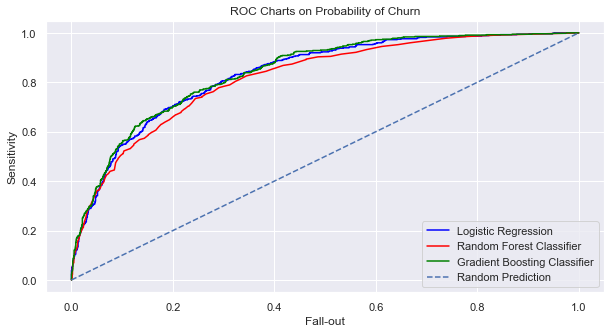

In [20]:
# Predict probability of churn
lr_probs = lr.predict_proba(x_test)[:,1]
rfc_probs = rfc.predict_proba(x_test)[:,1]
gbc_probs = gbc.predict_proba(x_test)[:,1]

# ROC Chart components
fallout_lr, sensitivity_lr, thresholds_lr = roc_curve(y_test, lr_probs)
fallout_rfc, sensitivity_rfc, thresholds_rfc = roc_curve(y_test, rfc_probs)
fallout_gbc, sensitivity_gbc, thresholds_gbc = roc_curve(y_test, gbc_probs)

# ROC Chart with both
plt.figure(figsize=(10,5))
plt.plot(fallout_lr, sensitivity_lr, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_rfc, sensitivity_rfc, color = 'red', label='%s' % 'Random Forest Classifier')
plt.plot(fallout_gbc, sensitivity_gbc, color = 'green', label='%s' % 'Gradient Boosting Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Charts on Probability of Churn")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

In [21]:
# Print the logistic Regression AUC with formatting
print("Logistic Regression AUC Score: %0.4f" % roc_auc_score(y_test, lr_probs))
# Print the Random Forest Classifier AUC with formatting
print("Random Forest Classifier AUC Score: %0.4f" % roc_auc_score(y_test, rfc_probs))
# Print the Gradient Boosting Classifier AUC with formatting
print("Gradient Boosting Classifier AUC Score: %0.4f" % roc_auc_score(y_test, gbc_probs))

Logistic Regression AUC Score: 0.8357
Random Forest Classifier AUC Score: 0.8192
Gradient Boosting Classifier AUC Score: 0.8419


**Menentukan Model Terbaik**

Model yang baik adalah model yang mampu memberikan performa bagus di fase training dan testing model.
- **Over-Fitting** adalah suatu kondisi dimana model mampu memprediksi dengan sangat baik di fase training, akan tetapi tidak mampu memprediksi sama baiknya di fase testing.
- **Under-Fitting** adalah suatu kondisi dimana model kurang mampu memprediksi dengan baik di fase training, akan tetapi mampu memprediksi dengan baik di fase testing.
- **Appropriate-Fitting** adalah suatu kondisi dimana model mampu memprediksi dengan baik di fase training maupun di fase testing.

Berdasarkan pemodelan yang telah dilakukan dengan menggunakan model **Logistic Regression, Random Forest dan Gradient Boosting**, maka dapat disimpulkan untuk **memprediksi churn dari pelanggan DQLab Telco** dengan menggunakan dataset ini model terbaiknya adalah menggunakan algortima **Logistic Regression**. Hal ini dikarenakan performa dari model Logistic Regression cenderung mampu memprediksi sama baiknya di fase training maupun testing (akurasi training 79.8%, akurasi testing 80.6%), di lain sisi algoritma lainnya cenderung Over-Fitting performanya. Selain itu model Logistic Regression juga menghasilkan **Area Under Curve (AUC) score 0.8357** yang berarti sudah cukup baik. Akan tetapi hal ini tidak menjadikan kita untuk menarik kesimpulan bahwsannya jika untuk melakukan pemodelan apapun maka digunakan Logistic Regression, kita tetap harus melakukan banyak percobaan model untuk menentukan mana yang terbaik.